<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [121]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### Read the data

Load the csv file and print the first five observations.

In [149]:
df = pd.read_csv('diamond_data.csv')
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.300000,Good,F,61.100000,61.000000,682,4.290000,4.320000,2.630000
1,0.720000,Ideal,H,62.000000,56.000000,2443,5.800000,5.740000,3.580000
2,1.710000,Premium,J,62.900000,58.000000,8848,7.640000,7.580000,4.790000
3,1.010000,Premium,E,59.200000,59.000000,7287,6.670000,6.600000,3.930000
4,0.520000,Ideal,D,62.700000,56.000000,1720,5.170000,5.140000,3.230000


In [3]:
df.isna().sum()

carat    0
cut      0
color    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [4]:
df.dtypes

carat    float64
cut       object
color     object
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df['y'].skew()

0.4383878452014628

In [ ]:
sns.distplot(df['y'])

In [7]:
np.log(df['y']).skew()

0.15322643692701352

In [8]:
from sklearn.preprocessing import PowerTransformer

In [9]:
pt = PowerTransformer()

In [16]:
r = pd.DataFrame(pt.fit_transform(df[['y']]))
print('the skewness after applying transformation using power transforme is',r.skew())

the skewness after applying transformation using power transforme is 0   0.041319
dtype: float64


In [15]:
pt.lambdas_

array([-0.67664821])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
df.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.300000,Good,F,61.100000,61.000000,682,4.290000,4.320000,2.630000
1,0.720000,Ideal,H,62.000000,56.000000,2443,5.800000,5.740000,3.580000
2,1.710000,Premium,J,62.900000,58.000000,8848,7.640000,7.580000,4.790000
3,1.010000,Premium,E,59.200000,59.000000,7287,6.670000,6.600000,3.930000
4,0.520000,Ideal,D,62.700000,56.000000,1720,5.170000,5.140000,3.230000


In [123]:
l = ['cut','color']
encode = pd.get_dummies(df,columns=l,drop_first=True)
encode.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.300000,61.100000,61.000000,682,4.290000,4.320000,2.630000,1,0,0,0,0,1,0,0,0,0
1,0.720000,62.000000,56.000000,2443,5.800000,5.740000,3.580000,0,1,0,0,0,0,0,1,0,0
2,1.710000,62.900000,58.000000,8848,7.640000,7.580000,4.790000,0,0,1,0,0,0,0,0,0,1
3,1.010000,59.200000,59.000000,7287,6.670000,6.600000,3.930000,0,0,1,0,1,0,0,0,0,0
4,0.520000,62.700000,56.000000,1720,5.170000,5.140000,3.230000,0,1,0,0,0,0,0,0,0,0


In [20]:
X = encode.drop('price',axis=1)
Y = encode.price
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:24:53   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272

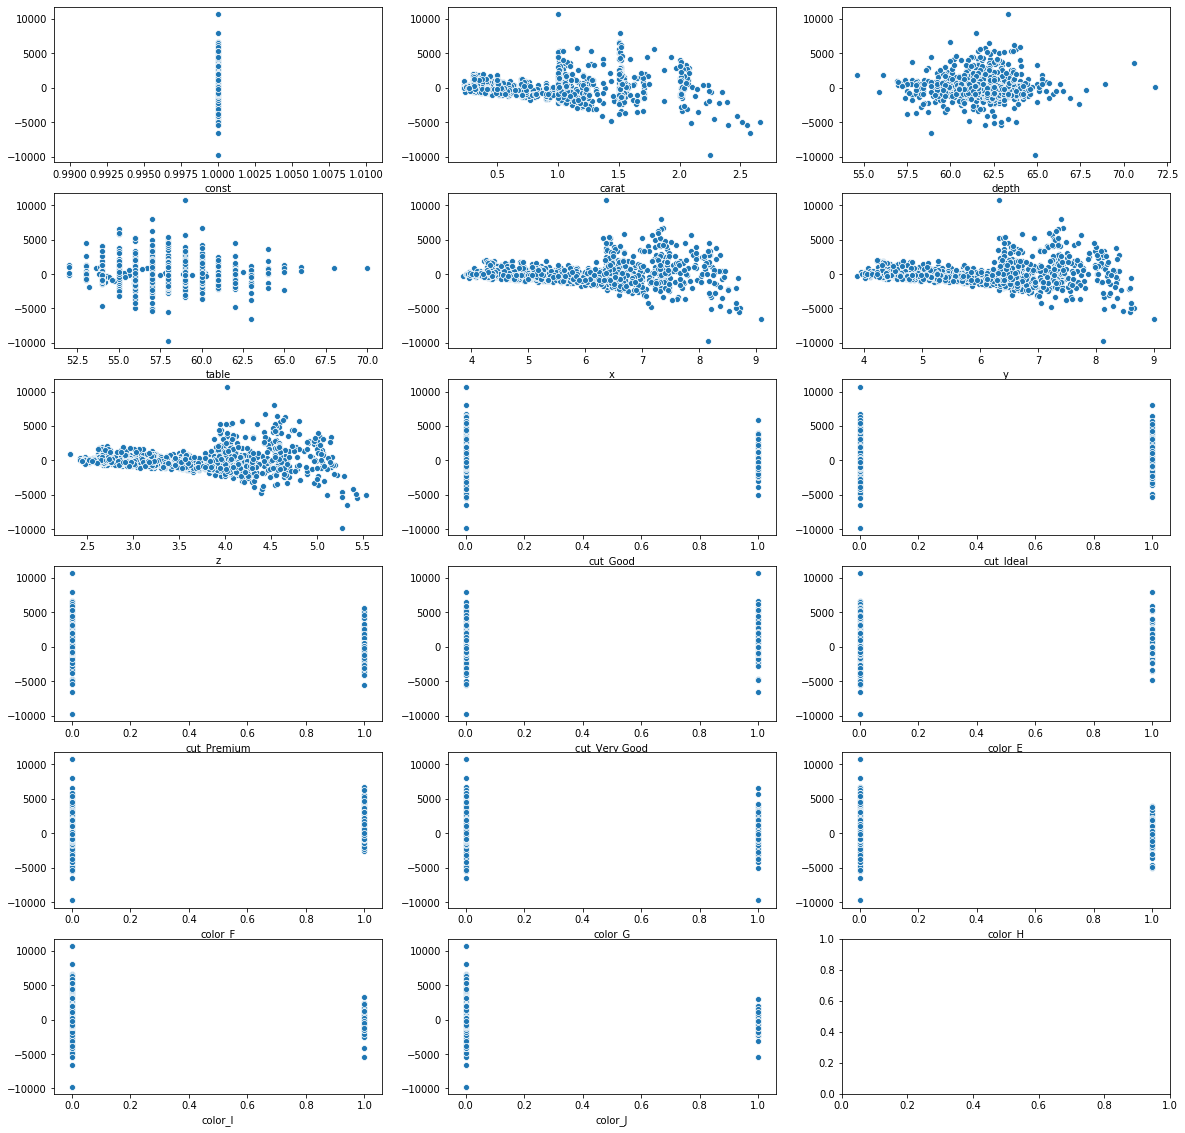

In [25]:
fig, ax = plt.subplots(nrows = 6, ncols= 3, figsize=(20, 20))
for variable, subplot in zip(X.columns, ax.flatten()):
    sns.scatterplot(X[variable], model.resid , ax=subplot)


In [ ]:
#no patterns found in residuals of fetaures

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [51]:
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
sfs_forward = sfs(estimator=lr,k_features=17,scoring='r2',cv=10)
sfs = sfs_forward.fit(X,Y)

In [55]:
sfs.get_metric_dict()

{1: {'feature_idx': (1,),
  'cv_scores': array([0.85847107, 0.89619931, 0.85923887, 0.87574134, 0.8667215 ,
         0.84735115, 0.87573223, 0.84396921, 0.83667501, 0.85904573]),
  'avg_score': 0.8619145413349436,
  'feature_names': ('carat',),
  'ci_bound': 0.012381426407465286,
  'std_dev': 0.016670540612690844,
  'std_err': 0.005556846870896948},
 2: {'feature_idx': (1, 6),
  'cv_scores': array([0.85947153, 0.90898521, 0.87811205, 0.88237939, 0.88411241,
         0.85632253, 0.87644962, 0.85373925, 0.84131591, 0.86916275]),
  'avg_score': 0.8710050661189772,
  'feature_names': ('carat', 'z'),
  'ci_bound': 0.013604767831544459,
  'std_dev': 0.018317666090980053,
  'std_err': 0.0061058886969933505},
 3: {'feature_idx': (1, 6, 16),
  'cv_scores': array([0.86701852, 0.91623448, 0.88372952, 0.88926443, 0.88575342,
         0.86489892, 0.8903425 , 0.85846596, 0.85455297, 0.87252079]),
  'avg_score': 0.8782781516182547,
  'feature_names': ('carat', 'z', 'color_J'),
  'ci_bound': 0.0130490

In [56]:
from mlxtend.plotting import plot_sequential_feature_selection as sfs_plot

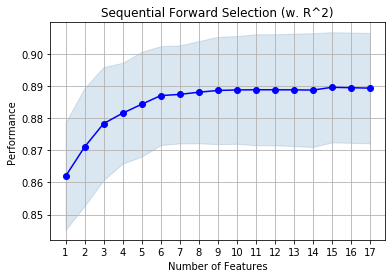

In [57]:
fig = plot_sfs(sfs.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()


In [58]:
sfs.k_feature_names_

('const',
 'carat',
 'depth',
 'table',
 'x',
 'y',
 'z',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J')

In [59]:
sfs.k_score_

0.8892894166072274

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [189]:
X = encode.drop('price',axis=1)
y = encode.price
X = sm.add_constant(X)
mod_cv = sm.OLS(Y,X).fit()
print(mod_cv.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:53:07   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272

In [191]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()

In [199]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [206]:
score_train = cross_val_score(estimator=lr,X=X_train,y=Y_train,cv=4,scoring='r2')
score_train

array([0.86352802, 0.87530725, 0.90821897, 0.90494852])

In [ ]:
#The computed R2 for each model is [0.86352802, 0.87530725, 0.90821897, 0.90494852]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
df_num = df.select_dtypes(include=np.number)

In [62]:
X = df_num.drop('price',axis=1)
Y = df.price
X = sm.add_constant(X)
mod = sm.OLS(Y,X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1807.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:17:12   Log-Likelihood:                -13458.
No. Observations:                1547   AIC:                         2.693e+04
Df Residuals:                    1540   BIC:                         2.697e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3505.1570   8768.887     -0.400      0.6

In [65]:
mod.pvalues.sort_values(ascending=False)

const   0.689413
x       0.161192
depth   0.117919
z       0.008233
y       0.002391
table   0.000000
carat   0.000000
dtype: float64

In [ ]:
#varuiable x has highest pval so, it canbe treated as most insignificant feature

In [68]:
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
sfs_back = sfs(estimator=lr,forward=False,scoring='r2',cv=10,k_features=1)
sfs_back_feat = sfs_back.fit(X,Y)

In [71]:
sfs_back_feat.get_metric_dict()

{7: {'feature_idx': (0, 1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.85874724, 0.91346638, 0.87761291, 0.88740222, 0.89033431,
         0.85905756, 0.87609737, 0.85219118, 0.84097815, 0.88076888]),
  'avg_score': 0.873665620492187,
  'feature_names': ('const', 'carat', 'depth', 'table', 'x', 'y', 'z'),
  'ci_bound': 0.01501707320013403,
  'std_dev': 0.020219215494883803,
  'std_err': 0.0067397384982946},
 6: {'feature_idx': (0, 1, 2, 3, 5, 6),
  'cv_scores': array([0.85873534, 0.91299023, 0.88039679, 0.88670521, 0.88973118,
         0.85841577, 0.87695668, 0.85556612, 0.84101345, 0.87985646]),
  'avg_score': 0.8740367229015902,
  'feature_names': ('const', 'carat', 'depth', 'table', 'y', 'z'),
  'ci_bound': 0.014699102538118515,
  'std_dev': 0.01979109496496022,
  'std_err': 0.006597031654986741},
 5: {'feature_idx': (1, 2, 3, 5, 6),
  'cv_scores': array([0.85873534, 0.91299023, 0.88039679, 0.88670521, 0.88973118,
         0.85841577, 0.87695668, 0.85556612, 0.84101345, 0.87985646]),
  '

In [ ]:
#on first iteration feature X(length of diamond) is trated as most significant fetaure based on Pvalue

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
encode.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,0.300000,61.100000,61.000000,682,4.290000,4.320000,2.630000,1,0,0,0,0,1,0,0,0,0
1,0.720000,62.000000,56.000000,2443,5.800000,5.740000,3.580000,0,1,0,0,0,0,0,1,0,0
2,1.710000,62.900000,58.000000,8848,7.640000,7.580000,4.790000,0,0,1,0,0,0,0,0,0,1
3,1.010000,59.200000,59.000000,7287,6.670000,6.600000,3.930000,0,0,1,0,1,0,0,0,0,0
4,0.520000,62.700000,56.000000,1720,5.170000,5.140000,3.230000,0,1,0,0,0,0,0,0,0,0


In [90]:
X = encode.drop('price',axis=1)
Y = encode.price
X = sm.add_constant(X)
mod_res = sm.OLS(Y,X).fit()
print(mod_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 31 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:33:07   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272

In [76]:
from scipy.stats import shapiro

In [77]:
shapiro(mod_res.resid)
#as pvalue is < 0.05 we reject null hypothesis stating the residuals are not normally distributed

(0.8434852361679077, 1.5090839207569356e-36)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [160]:
l = ['cut','color']
encode = pd.get_dummies(df,columns=l,drop_first=True)
encode.head()
encode.shape

(1547, 17)

In [148]:
from scipy.stats import zscore

In [163]:
z = stats.zscore(encode)
z = pd.DataFrame(z,columns=encode.columns)
z.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.032933,-0.460030,1.590487,-0.791282,-1.263882,-1.249387,-1.296248,3.074525,-0.807947,-0.579590,-0.548720,-0.471125,2.155455,-0.507665,-0.432736,-0.316677,-0.239617
1,-0.149950,0.165214,-0.646601,-0.363409,0.076712,0.022883,0.074751,-0.325254,1.237705,-0.579590,-0.548720,-0.471125,-0.463939,-0.507665,2.310879,-0.316677,-0.239617
2,1.931367,0.790458,0.248234,1.192823,1.710284,1.671457,1.820972,-0.325254,-0.807947,1.725359,-0.548720,-0.471125,-0.463939,-0.507665,-0.432736,-0.316677,4.173328
3,0.459729,-1.779989,0.695652,0.813545,0.849107,0.793412,0.579856,-0.325254,-0.807947,1.725359,-0.548720,2.122578,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617
4,-0.570418,0.651515,-0.646601,-0.539077,-0.482609,-0.514696,-0.430354,-0.325254,1.237705,-0.579590,-0.548720,-0.471125,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617


In [164]:
z1 = z[~((z < -3) | (z > 3)).any(axis=1)]
z1.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
1,-0.149950,0.165214,-0.646601,-0.363409,0.076712,0.022883,0.074751,-0.325254,1.237705,-0.579590,-0.548720,-0.471125,-0.463939,-0.507665,2.310879,-0.316677,-0.239617
3,0.459729,-1.779989,0.695652,0.813545,0.849107,0.793412,0.579856,-0.325254,-0.807947,1.725359,-0.548720,2.122578,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617
4,-0.570418,0.651515,-0.646601,-0.539077,-0.482609,-0.514696,-0.430354,-0.325254,1.237705,-0.579590,-0.548720,-0.471125,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617
5,-1.138050,-0.598973,0.695652,-0.817280,-1.494713,-1.437539,-1.512722,-0.325254,-0.807947,-0.579590,1.822424,2.122578,-0.463939,-0.507665,-0.432736,-0.316677,-0.239617
6,-0.065856,-1.363160,-0.199183,-0.415891,0.192128,0.175197,0.017025,-0.325254,-0.807947,1.725359,-0.548720,-0.471125,-0.463939,-0.507665,2.310879,-0.316677,-0.239617


In [165]:
X2 = z1.drop('price',axis=1)
Y = z1.price
X2 = sm.add_constant(X2)
check = sm.OLS(Y,X2).fit()
print(check.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     648.8
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:20:38   Log-Likelihood:                -210.02
No. Observations:                1153   AIC:                             448.0
Df Residuals:                    1139   BIC:                             518.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat             1.6835      0.061     27.609

In [166]:
check.resid.skew()

1.4169256416618443

In [ ]:
#even after delaing with outliers,transforming,scaling, we couldn't able to reduce the skewness of residuals

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [167]:
X = encode.drop('price',axis=1)
Y = df.price
X = sm.add_constant(X)
mod = sm.OLS(Y,X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:25:07   Log-Likelihood:                -13345.
No. Observations:                1547   AIC:                         2.672e+04
Df Residuals:                    1530   BIC:                         2.681e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.066e+04   8378.089     -1.272

In [170]:
lr = LinearRegression()
lr.fit(X.drop('const',axis=1),Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
sfs_back = sfs(estimator=lr,forward=False,scoring='r2',cv=10,k_features=7)
sfs_back_feat = sfs_back.fit(X,Y)
sfs_back_feat.get_metric_dict()

{17: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16),
  'cv_scores': array([0.87497201, 0.91296688, 0.88719374, 0.90161835, 0.90333363,
         0.88441959, 0.90635656, 0.86370692, 0.86123041, 0.89709607]),
  'avg_score': 0.8892894166072274,
  'feature_names': ('const',
   'carat',
   'depth',
   'table',
   'x',
   'y',
   'z',
   'cut_Good',
   'cut_Ideal',
   'cut_Premium',
   'cut_Very Good',
   'color_E',
   'color_F',
   'color_G',
   'color_H',
   'color_I',
   'color_J'),
  'ci_bound': 0.012728295919301873,
  'std_dev': 0.01713757099304262,
  'std_err': 0.00571252366434754},
 16: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16),
  'cv_scores': array([0.87495874, 0.91301738, 0.88769841, 0.90178316, 0.90356732,
         0.88446889, 0.90633111, 0.86401683, 0.86121891, 0.89720753]),
  'avg_score': 0.8894268283043729,
  'feature_names': ('const',
   'carat',
   'depth',
   'table',
   'x

In [172]:
sfs_back_feat.k_feature_names_

('carat', 'depth', 'z', 'cut_Ideal', 'color_H', 'color_I', 'color_J')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [175]:
col_encode = pd.get_dummies(df['color'],drop_first=True)
X = col_encode
y = df.price
X = sm.add_constant(X)
mod_col = sm.OLS(Y,X).fit()
print(mod_col.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           7.55e-07
Time:                        00:34:35   Log-Likelihood:                -15051.
No. Observations:                1547   AIC:                         3.012e+04
Df Residuals:                    1540   BIC:                         3.015e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3590.7087    283.805     12.652      0.0

In [177]:
mod_col.pvalues.sort_values(ascending=False)
#as observed below F,G,E are the insignificant colors

F       0.995312
G       0.391273
E       0.179116
H       0.006346
I       0.002928
J       0.002236
const   0.000000
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [180]:
from sklearn.feature_selection import RFE
lr = LinearRegression()

In [181]:
X = encode.drop('price',axis=1)
y = df.price

In [184]:
rfe_mod = RFE(estimator=lr,n_features_to_select=5)
mod_rfe = rfe_mod.fit(X,Y)
ind = pd.Series(data=mod_rfe.ranking_,index=X.columns)

In [187]:
ind[ind==1]

carat      1
x          1
y          1
z          1
color_J    1
dtype: int32

In [188]:
ind

carat             1
depth             8
table            11
x                 1
y                 1
z                 1
cut_Good          7
cut_Ideal         4
cut_Premium       6
cut_Very Good     5
color_E          12
color_F           9
color_G          10
color_H           3
color_I           2
color_J           1
dtype: int32